In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',None)

In [2]:
# use !wget -nc 'github path' to pull hospital data
# weekly hospital data
!wget "https://raw.githubusercontent.com/jtjia26/hospital_admission_project/refs/heads/main/raw_weekly_hospital_respiratory_data_2020_2024.csv"
weekly_hospital_raw = pd.read_csv('raw_weekly_hospital_respiratory_data_2020_2024.csv')


--2025-02-15 08:23:30--  https://raw.githubusercontent.com/jtjia26/hospital_admission_project/refs/heads/main/raw_weekly_hospital_respiratory_data_2020_2024.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6204779 (5.9M) [text/plain]
Saving to: ‘raw_weekly_hospital_respiratory_data_2020_2024.csv.2’

raw_weekly_hospital 100%[===================>]   5.92M  --.-KB/s    in 0.08s   

2025-02-15 08:23:31 (69.7 MB/s) - ‘raw_weekly_hospital_respiratory_data_2020_2024.csv.2’ saved [6204779/6204779]



In [3]:
# Deep Copy - to prevent changes the original dataset
weekly_hospital_data = weekly_hospital_raw.copy()

In [4]:
weekly_hospital_data.head()

,Week Ending Date,Geographic aggregation,Number of Inpatient Beds,Number of Adult Inpatient Beds,Number of Pediatric Inpatient beds,Number of Inpatient Beds Occupied,Number of Adult Inpatient Beds Occupied,Number of Pediatric Inpatient Beds Occupied,Number of ICU Beds,Number of Adult ICU Beds,Number of Pediatric ICU Beds,Number of ICU Beds Occupied,Number of Adult ICU Beds Occupied,Number of Pediatric ICU Beds Occupied,Number of Adult Patients Hospitalized with COVID-19,Number of Pediatric Patients Hospitalized with COVID-19,Total Patients Hospitalized with COVID-19,Number of Adult Patients Hospitalized with Influenza,Number of Pedatric Patients Hospitalized with Influenza,Total Patients Hospitalized with Influenza,Number of Adult Patients Hospitalized with RSV,Number of Pediatric Patients Hospitalized with RSV,Total Patients Hospitalized with RSV,Number of Adult ICU Patients Hospitalized with COVID-19,Number of Pediatric ICU Patients Hospitalized with COVID-19,Total ICU Patients Hospitalized with COVID-19,Number of Adult ICU Patients Hospitalized with Influenza,Number of Pediatric ICU Patients Hospitalized with Influenza,Total ICU Patients Hospitalized with Influenza,Number of Adult ICU Patients Hospitalized with RSV,Number of Pediatric ICU Patients Hospitalized with RSV,Total ICU Patients Hospitalized with RSV,"Number of Pediatric COVID-19 Admissions, 0-4 years","Number of Pediatric COVID-19 Admissions, 5-17 years",Total Pediatric COVID-19 Admissions,"Number of Adult COVID-19 Admissions, 18-49 years","Number of Adult COVID-19 Admissions, 50-64 years","Number of Adult COVID-19 Admissions, 65-74 years","Number of Adult COVID-19 Admissions, 75 plus",Total Adult COVID-19 Admissions,"Number of COVID-19 Admissions, unknown age",Total COVID-19 Admissions,"Number of Pediatric Influenza Admissions, 0-4 years","Number of Pediatric Influenza Admissions, 5-17 years",Total Pediatric Influenza Admissions,"Number of Adult Influenza Admissions, 18-49 years","Number of Adult Influenza Admissions, 50-64 years","Number of Adult Influenza Admissions, 65-74 years","Number of Adult Influenza Admissions, 75 plus years",Total Adult Influenza Admissions,"Number of Influenza Admissions, unknown age",Total Influenza Admissions,"Number of Pediatric RSV Admissions, 0-4 years","Number of Pediatric RSV Admissions, 5-17 years",Total Pediatric RSV Admissions,"Number of Adult RSV Admissions, 18-49 years","Number of Adult RSV Admissions, 50-64 years","Number of Adult RSV Admissions, 65-74 years","Number of Adult RSV Admissions, 75 plus years",Total Adult RSV Admissions,"Number of RSV Admissions, unknown age",Total RSV Admissions,Percent Inpatient Beds Occupied,Percent Inpatient Beds Occupied by COVID-19 Patients,Percent Inpatient Beds Occupied by Influenza Patients,Percent Inpatient Beds Occupied by RSV Patients,Percent ICU Beds Occupied,Percent ICU Beds Occupied by COVID-19 Patients,Percent ICU Beds Occupied by Influenza Patients,Percent ICU Beds Occupied by RSV Patients,Percent Adult COVID-19 Admissions,Percent Pediatric COVID-19 Admissions,Percent Adult Influenza Admissions,Percent Pediatric Influenza Admissions,Percent Adult RSV Admissions,Percent Pediatric RSV Admissions,Number Hospitals Reporting Number of Inpatient Beds,Number Hospitals Reporting Number of Inpatient Beds Occupied,Number Hospitals Reporting Number of ICU Beds,Number Hospitals Reporting Number of ICU Beds Occupied,Number Hospitals Reporting Total Patients Hospitalized with COVID-19,Number Hospitals Reporting TotalPatients Hospitalized with Influenza,Number Hospitals Reporting Total Patients Hospitalized with RSV,Number Hospitals Reporting ICU Patients Hospitalized with COVID-19,Number Hospitals Reporting ICU Patients Hospitalized with Influenza,Number Hospitals Reporting ICU Patients Hospitalized with RSV,Number Hospitals Reporting Pediatric COVID-19 Admissions,Number Hospitals Reporting Adult COVID-19 Admissions,Number Hospitals Reporting COVID-19 Admissions,Number Hospitals Reporting P

In [5]:
# Remove leading and trailing whitespaces from column names
weekly_hospital_data.columns = weekly_hospital_data.columns.str.strip()

In [6]:
weekly_hospital_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Number of Inpatient Beds,12521.0,23993.299018,90605.539900,7.0,2726.0,8017.0,16381.0,834208.0
Number of Adult Inpatient Beds,12506.0,21658.877899,81756.939919,3.0,2329.0,7253.5,15006.5,746110.0
Number of Pediatric Inpatient beds,12485.0,1440.099880,5514.682973,0.0,145.0,439.0,910.0,73572.0
Number of Inpatient Beds Occupied,12521.0,27972.333040,808421.106845,0.0,1988.0,5465.0,12047.0,64044023.0
Number of Adult Inpatient Beds Occupied,12510.0,26482.350200,808070.108376,0.0,1757.0,5053.5,10975.5,64002654.0
...,...,...,...,...,...,...,...,...
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003557,0.077205,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent Inpatient Beds Occupied by RSV Patients from Prior Week,12711.0,0.003616,0.039475,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by COVID-19 Patients from Prior Week,12711.0,0.000105,0.054399,-1.0,0.0,0.0,0.0,1.0
Absolute Change in the Percent Hospitals Reporting Percent ICU Beds Occupied by Influenza Patients from Prior Week,12711.0,0.003313,0.076576,-1.0,0.0,0.0,0.0,1.0


In [7]:
# Our Main Focus is the data regarding the hospitals in California
only_california = weekly_hospital_data.loc[weekly_hospital_data['Geographic aggregation'] == 'CA']

In [8]:
# Convert 'Week Ending Date' to datetime
only_california['Week Ending Date'] = pd.to_datetime(only_california['Week Ending Date'])

# Convert percentages from 0.25 to 25%

percentage_converted = False

if not percentage_converted:
  only_california['Percent Inpatient Beds Occupied by COVID-19 Patients'] *= 100
  percentage_converted = True

# sorting the dates in the correct order
only_california.sort_values(by='Week Ending Date', ascending=True, inplace=True)
# print(only_california) printing to check

<ipython-input-8-273aa41e1d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_california['Week Ending Date'] = pd.to_datetime(only_california['Week Ending Date'])
<ipython-input-8-273aa41e1d6e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_california['Percent Inpatient Beds Occupied by COVID-19 Patients'] *= 100
<ipython-input-8-273aa41e1d6e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

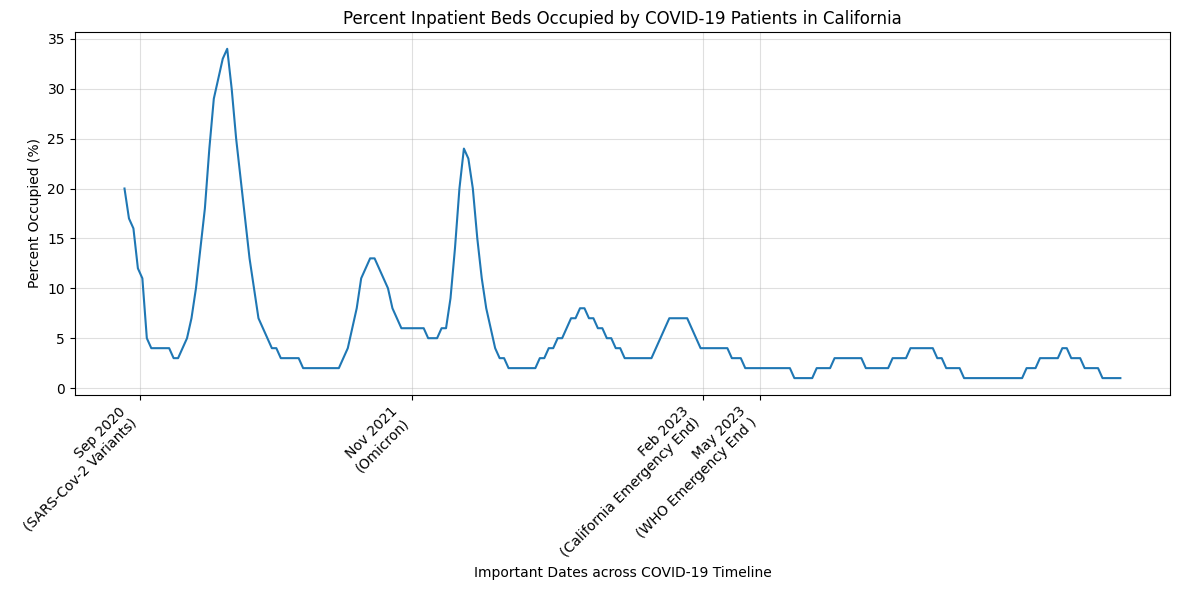

In [9]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(only_california['Week Ending Date'], only_california['Percent Inpatient Beds Occupied by COVID-19 Patients'])
plt.title('Percent Inpatient Beds Occupied by COVID-19 Patients in California')
plt.xlabel('Important Dates across COVID-19 Timeline')
plt.ylabel('Percent Occupied (%)')
plt.grid(True, alpha=0.4)  # Add a grid for better readability

# Set custom x-ticks based on key events
custom_ticks = pd.to_datetime([
    '2020-09-01', #SARS-Cov-2 Variants
    '2021-11-01',  # Omicron variant
    '2023-02-01',   # End of State of Emergency
    '2023-05-01'   #WHO declares COVID-19 no longer as emergency
])

custom_tick_labels = [
    'Sep 2020\n(SARS-Cov-2 Variants)',
    'Nov 2021\n(Omicron)',
    'Feb 2023\n(California Emergency End)',
    'May 2023\n(WHO Emergency End )'
]

plt.xticks(custom_ticks, custom_tick_labels, rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Percentage of Inpatient Beds Occupied by COVID-19 Patients in California (Late 2020 - 2024)

**Several Key Events throughout Covid Timeline**

September - December 2020: Alpha, Beta, Epislon, & Gamma variant detected

Late November 2021: Original Omicron variant identified3.

November 2020: Epsilon variant (CAL.20C) first observed in California, USA1.

February 2023: The COVID-19 State of Emergency in California ended.

May 2023: World Health Organizatio declared that COVID-19 was no longer a public health emergency




**Key Observations**

Late 2020: The series of SARS-Cov-2 Variants that would appear across several places globally played a role in spiking inpatient bed occupany to highs of 35%, which persisted long into the next year where viruses tend to persist during the cold seasons.

November 2021: Higher vaccination rates and the lower severity of Omicron disease led to less inpatient bed admissions

February & May 2023: COVID-19 Deaths and Hospitalization had decreased significantly, allowing restrictions to ease.

<ipython-input-13-3929518d360f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_california['Percent ICU Beds Occupied by COVID-19 Patients'] *= 100
<ipython-input-13-3929518d360f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_california['Percent ICU Beds Occupied by Influenza Patients'] *= 100
<ipython-input-13-3929518d360f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

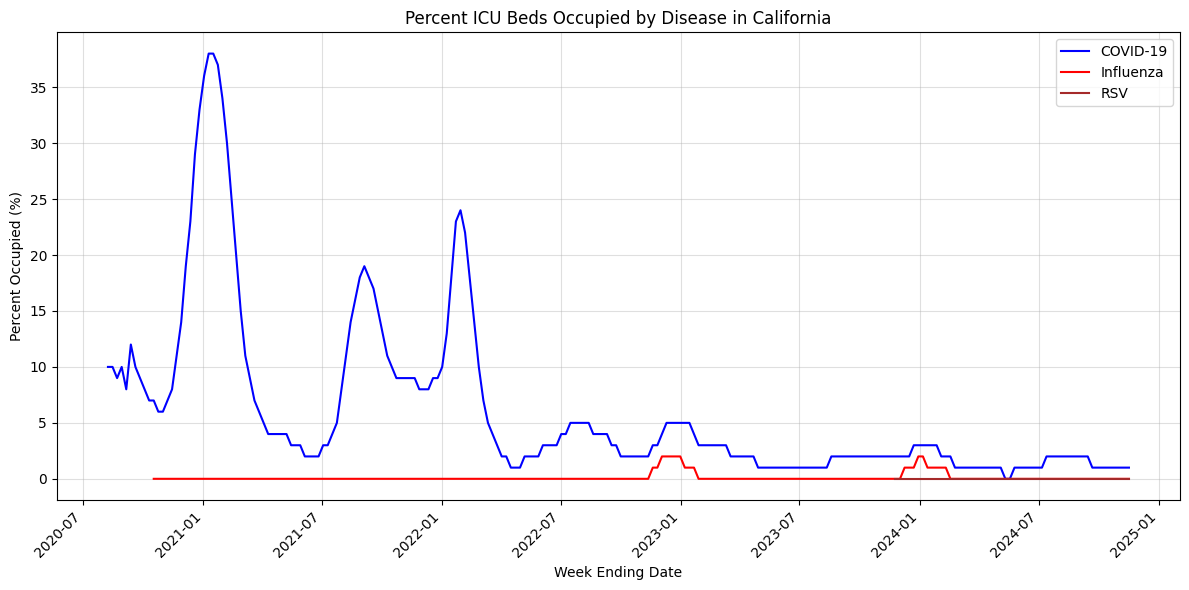

In [13]:
# Create a line graph comparing percent inpatient bed occupancy by disease (COVID-19, Influenza, RSV)

# Convert percentages from 0.25 to 25%

percentage_converted1 = False

if not percentage_converted1:
  only_california['Percent ICU Beds Occupied by COVID-19 Patients'] *= 100
  only_california['Percent ICU Beds Occupied by Influenza Patients'] *= 100
  only_california['Percent ICU Beds Occupied by RSV Patients'] *= 100
  percentage_converted1 = True

plt.figure(figsize=(12, 6))

# Plot each disease with a different color and label
plt.plot(only_california['Week Ending Date'], only_california['Percent ICU Beds Occupied by COVID-19 Patients'], label='COVID-19', color='blue')
plt.plot(only_california['Week Ending Date'], only_california['Percent ICU Beds Occupied by Influenza Patients'], label='Influenza', color='red')
plt.plot(only_california['Week Ending Date'], only_california['Percent ICU Beds Occupied by RSV Patients'], label='RSV', color='Brown')

# Customize the plot
plt.title('Percent ICU Beds Occupied by Disease in California')
plt.xlabel('Week Ending Date')
plt.ylabel('Percent Occupied (%)')
plt.grid(True, alpha=0.4)
plt.legend()  # Add a legend to distinguish the lines

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Percentage of ICU Beds Occupied by Disease (COVID-19, Influenza, RSV)

**Key Observations**
COVID-19 dominated ICU Bed Occupancy due to the need for more intensive car requiring mechanical ventilation  but Influenza showed seasonal spikes during the winters where Influenza is very prevalent.

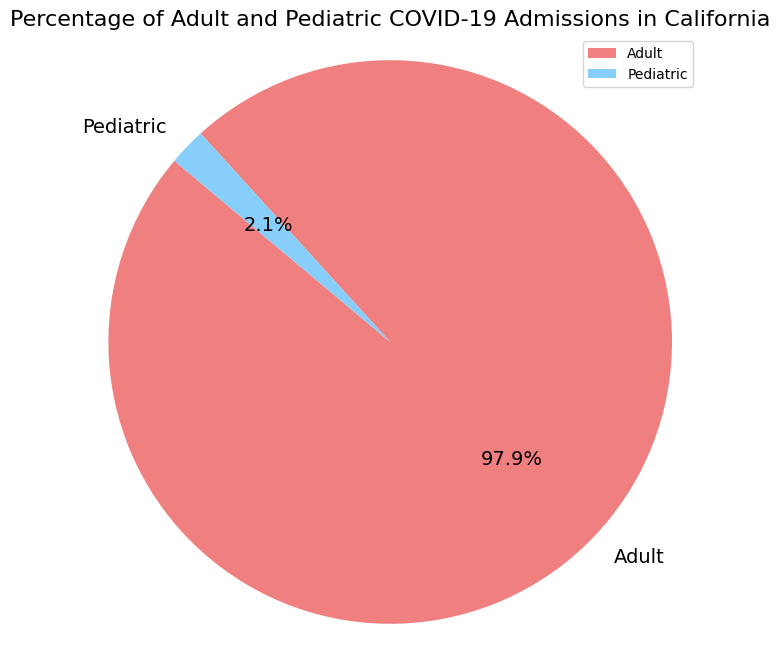

In [11]:
# Calculate percentages
total_adult_covid_admissions = only_california['Number of Adult Patients Hospitalized with COVID-19'].sum()
total_ped_covid_admissions = only_california['Number of Pediatric Patients Hospitalized with COVID-19'].sum()
total_covid_admissions = total_adult_covid_admissions + total_ped_covid_admissions

percent_adult = (total_adult_covid_admissions / total_covid_admissions) * 100
percent_ped = (total_ped_covid_admissions / total_covid_admissions) * 100

# Plotting
labels = ['Adult', 'Pediatric']
sizes = [percent_adult, percent_ped]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Percentage of Adult and Pediatric COVID-19 Admissions in California', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend
plt.legend(labels, loc="best")

# Display the plot
plt.show()


# How do the demographics differ across the COVID-19 Admissions in California?

Key Observations

Dominance of Adult Admissions: The graph shows that a significant majority of COVID-19 admissions are for adults, with approximately 98% of the total admissions. This indicates that adults are much more likely to be hospitalized with COVID-19 compared to pediatric patients.